# Coding Exercises (Part 12)

## Financial Data: Essential Workflows

## Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [7]:
import pandas as pd

In [8]:
us_stocks=pd.read_csv("us_stocks.csv",header=[0,1],index_col=[0],parse_dates=True)
us_stocks.head()

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

In [9]:
stocks=us_stocks["Adj Close"]["31-12-2015":"31-12-2018"]
# dataframe[slice] to filter the index
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


- __Visualize__ the Adjusted Close of the six stocks __over time__!

In [10]:
import matplotlib.pyplot as plt

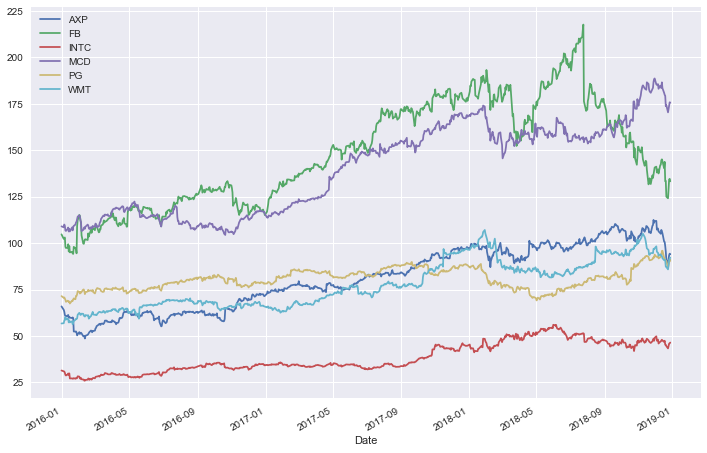

In [12]:
plt.style.use("seaborn")
stocks.plot(figsize=(12,8))
plt.show()

- __Visualize__ the __normalized__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!

In [35]:
norm_stocks = stocks/stocks.iloc[0]*100

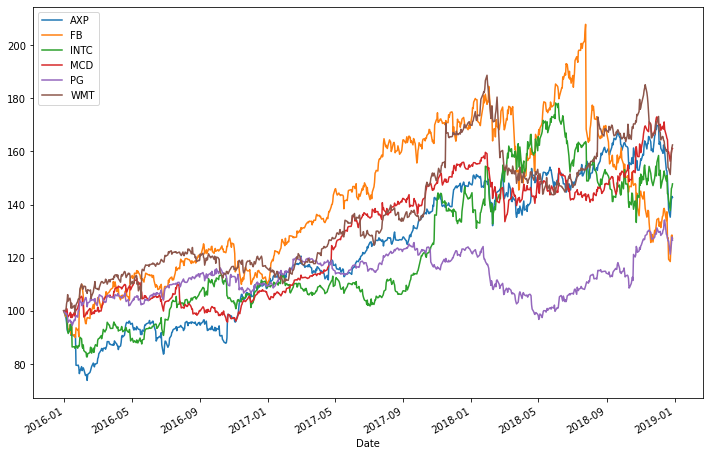

In [169]:
norm_stocks.plot(figsize=(12,8))
plt.show()

- Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [37]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [14]:
# idea to generate monthly return from daily price:
# step1: resample the time series by month and last
# step2: pct_change() to get change in percentage
end_p=stocks.resample("M",kind="period").last()
returns=end_p.pct_change().dropna()
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221


In [17]:
# get summary by aggregate
summary=returns.aggregate(["mean","std"])
summary

,AXP,FB,INTC,MCD,PG,WMT
mean,0.012162,0.008656,0.012559,0.014179,0.007358,0.014997
std,0.065456,0.063183,0.058963,0.041817,0.039945,0.054054


In [20]:
# we tend to make columns less than the rows
summary=summary.T.copy()
summary

,mean,std
AXP,0.012162,0.065456
FB,0.008656,0.063183
INTC,0.012559,0.058963
MCD,0.014179,0.041817
PG,0.007358,0.039945
WMT,0.014997,0.054054


- Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [157]:
summary.iloc[0]=summary.iloc[0]*12
summary.iloc[1]=summary.iloc[1]*(12**0.5)
summary=summary.T
summary

,mean,std
AXP,0.145942,0.226748
FB,0.103868,0.218871
INTC,0.150712,0.204255
MCD,0.170144,0.144859
PG,0.088297,0.138374
WMT,0.179962,0.187247


- __Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

['AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT']


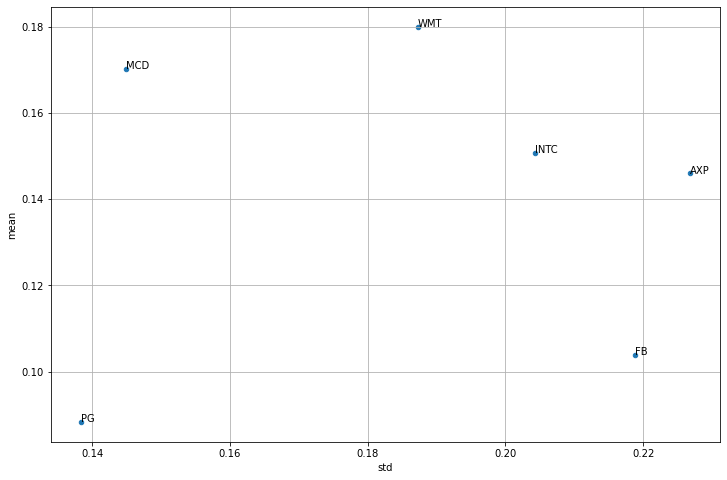

In [170]:
# plt.scatter(summary.iloc[1],summary.iloc[0])
summary.plot(x="std",y="mean",kind="scatter",figsize=(12,8),grid=True)
txt=list(summary.index)
print(txt)
for i in range(0,len(txt)):
#     plt.annotate(text,xy,xytext) to add comments to scatters
    plt.annotate(txt[i],(summary.iloc[i,1],summary.iloc[i,0]),(summary.iloc[i,1],summary.iloc[i,0]))   
plt.show()

- __Visualize__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns?

In [124]:
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221


In [125]:
import seaborn as sns

In [130]:
corr_matrix = returns.corr()
corr_matrix

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.068655,0.306292,0.261880,-0.099335,-0.048483
FB,0.068655,1.000000,0.169326,0.069091,-0.008261,0.149272
INTC,0.306292,0.169326,1.000000,0.084089,-0.074533,0.129686
MCD,0.261880,0.069091,0.084089,1.000000,0.177252,0.505501
PG,-0.099335,-0.008261,-0.074533,0.177252,1.000000,0.359595
WMT,-0.048483,0.149272,0.129686,0.505501,0.359595,1.000000


<AxesSubplot:>

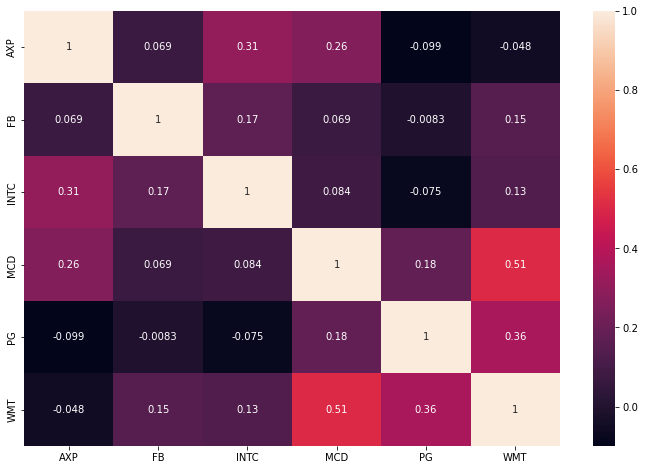

In [174]:
plt.figure(figsize=(12,8))
# to get heatmap we need correlation matrix as input of seaborn.heatmap()
# also when annot is True, corr will apprear on each square
sns.heatmap(corr_matrix,annot=True)

# Recap

105. specify the index and header when loading the csv data

`pd.read_csv(filename, header=num_list, index_col=num_list)`

110. calculate __monthly__ return 

step1. `resample` dataframe to monthly period

step2. `pct_change()` to get the changes
